In [154]:
import gradio as gr

In [155]:

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm, uniform
import scipy.integrate as integrate
from scipy.integrate import quad
import seaborn as sb
from pandas.plotting import scatter_matrix
from plotnine import ggplot

%matplotlib inline

In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score

In [157]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df_unchanged=df

In [158]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [159]:
count_students = df[df['Chance of Admit '] > 0.7].shape[0]

In [160]:
count_students = df[df['Chance of Admit '] > 0.7].shape[0]

In [161]:
sorted_df = df.sort_values(by='Chance of Admit ', ascending=False)

# Find the threshold value for the top 250 students
threshold_value = sorted_df.iloc[249]['Chance of Admit ']

print("Threshold value for the top 250 students:", threshold_value)

Threshold value for the top 250 students: 0.72


In [162]:
#Showing Plot
print("Number of Rows is :",df.shape[0])
print("Number of Columns is :",df.shape[1])

Number of Rows is : 500
Number of Columns is : 9


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [164]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [165]:
df.describe() #Calculates the mean,standard deviavtion,min,max.,count of each columns

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [166]:
df.nunique() #Calculates the number of unique values in each column

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [167]:
df.isna().sum() #Calculates the sum of null values(NA)/missing values in each column

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.103839    -0.141696          -0.067641   
GRE Score           -0.103839   1.000000     0.827200           0.635376   
TOEFL Score         -0.141696   0.827200     1.000000           0.649799   
University Rating   -0.067641   0.635376     0.649799           1.000000   
SOP                 -0.137352   0.613498     0.644410           0.728024   
LOR                 -0.003694   0.524679     0.541563           0.608651   
CGPA                -0.074289   0.825878     0.810574           0.705254   
Research            -0.005332   0.563398     0.467012           0.427047   
Chance of Admit      0.008505   0.810351     0.792228           0.690132   

                        SOP      LOR       CGPA  Research  Chance of Admit   
Serial

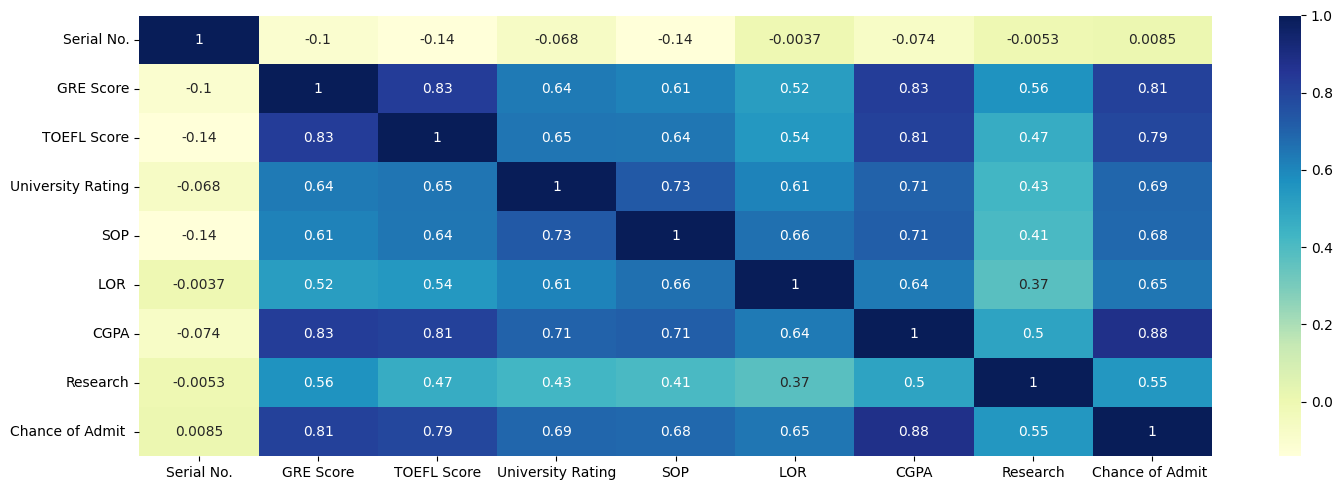

In [168]:
col_name=df.columns
print(col_name)
print(df.corr())
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [169]:
# sns.pairplot(df)

In [170]:
# scatter_matrix(df,figsize=(20,20))


C:\Users\heman\AppData\Local\Temp\ipykernel_6908\544192373.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



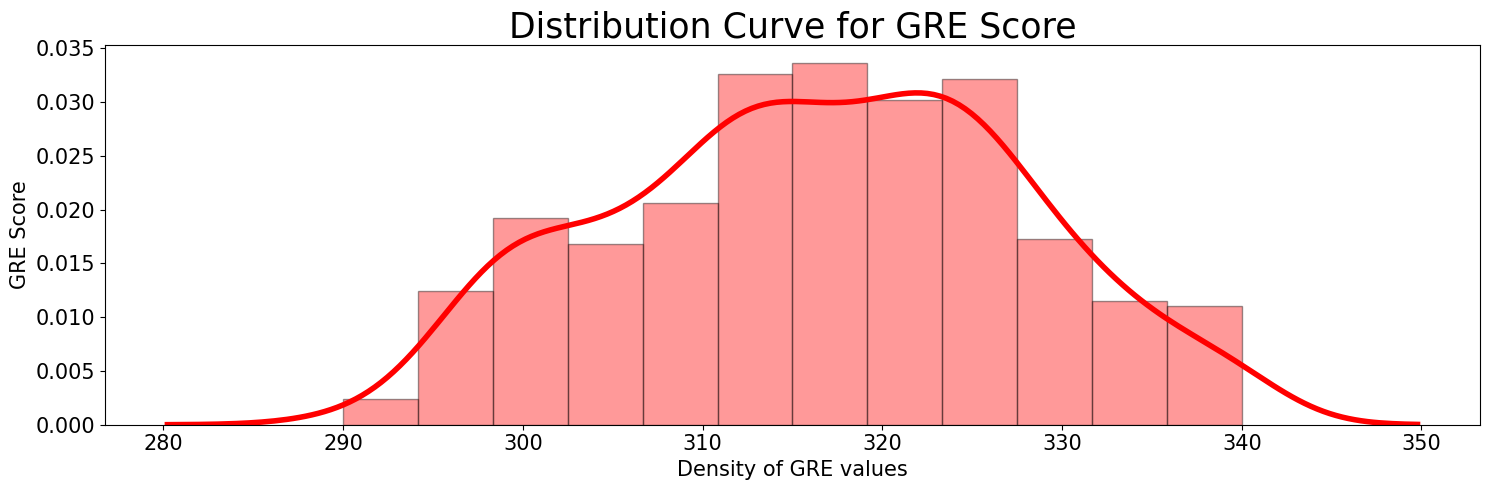

In [171]:
plt.rcParams["figure.figsize"] = [15,5]   #Size of figure
plt.rcParams["figure.autolayout"] = True

#Using seaborn library to make plots

sns.distplot(df['GRE Score'],hist=True,kde=True,
             color='red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

plt.xlabel("Density of GRE values",size=15)  # x-label of plot and size
plt.ylabel("GRE Score",size=15)  # y-label of plot and size
plt.title("Distribution Curve for GRE Score",size=25) #title of the plot
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_6908\1044467699.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



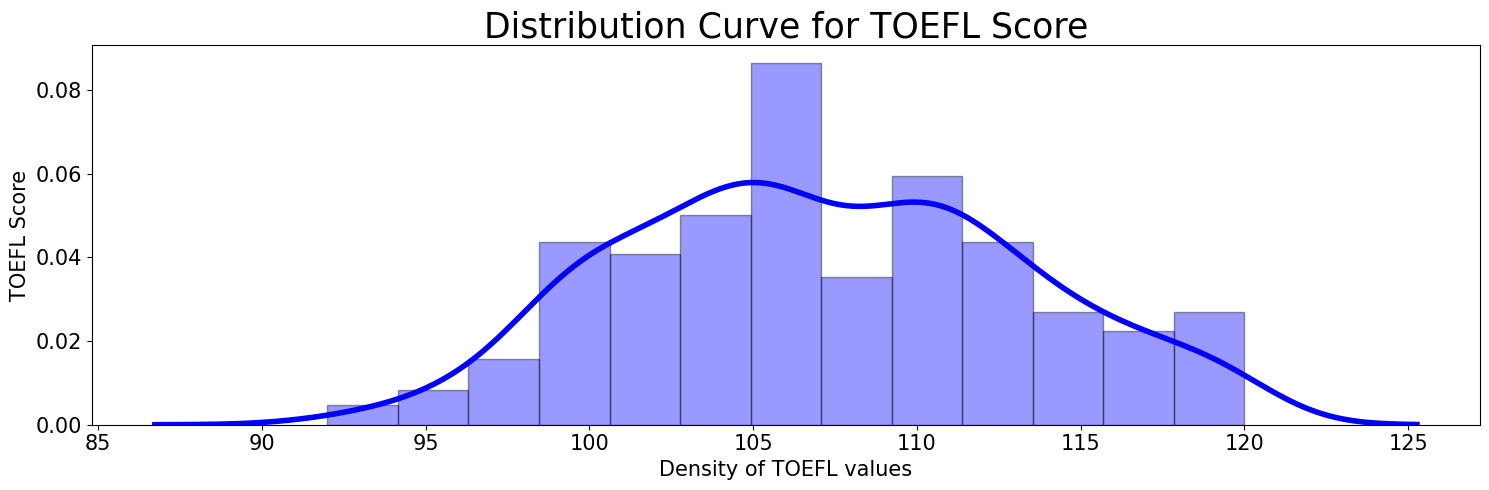

In [172]:
plt.rcParams["figure.figsize"] = [15,5]   #Size of figure
plt.rcParams["figure.autolayout"] = True

#Using seaborn library to make plots

sns.distplot(df['TOEFL Score'],hist=True,kde=True,
             color='blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

plt.xlabel("Density of TOEFL values",size=15)  # x-label of plot and size
plt.ylabel("TOEFL Score",size=15)  # y-label of plot and size
plt.title("Distribution Curve for TOEFL Score",size=25) #title of the plot
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

C:\Users\heman\AppData\Local\Temp\ipykernel_6908\4050402902.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



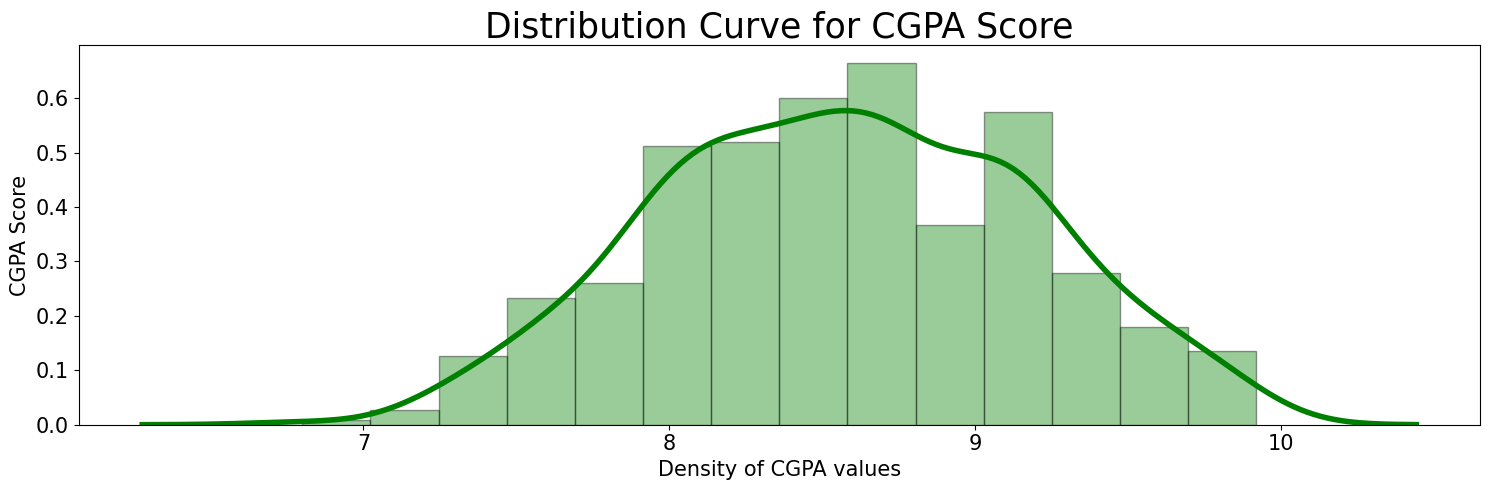

In [173]:
plt.rcParams["figure.figsize"] = [15,5]   #Size of figure
plt.rcParams["figure.autolayout"] = True

#Using seaborn library to make plots

sns.distplot(df['CGPA'],hist=True,kde=True,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

plt.xlabel("Density of CGPA values",size=15)  # x-label of plot and size
plt.ylabel("CGPA Score",size=15)  # y-label of plot and size
plt.title("Distribution Curve for CGPA Score",size=25) #title of the plot
plt.xticks(size=15)
plt.yticks(size=15)

plt.show()

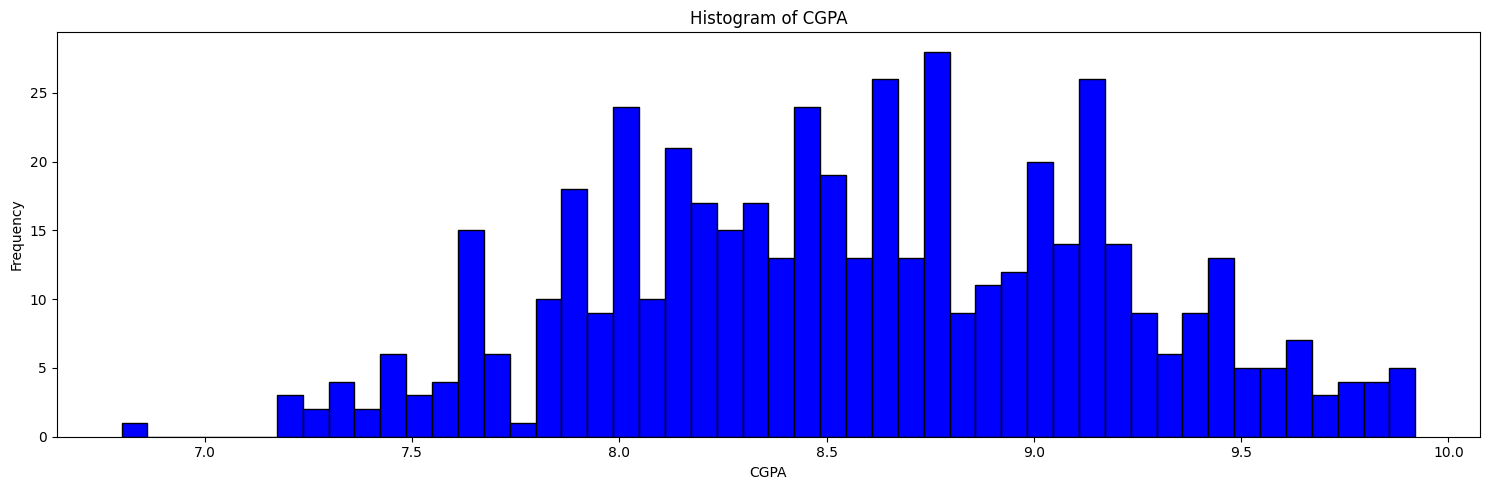

In [174]:
plt.hist(df['CGPA'], bins=50, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title(f'Histogram of CGPA')

# Show the plot
plt.show()

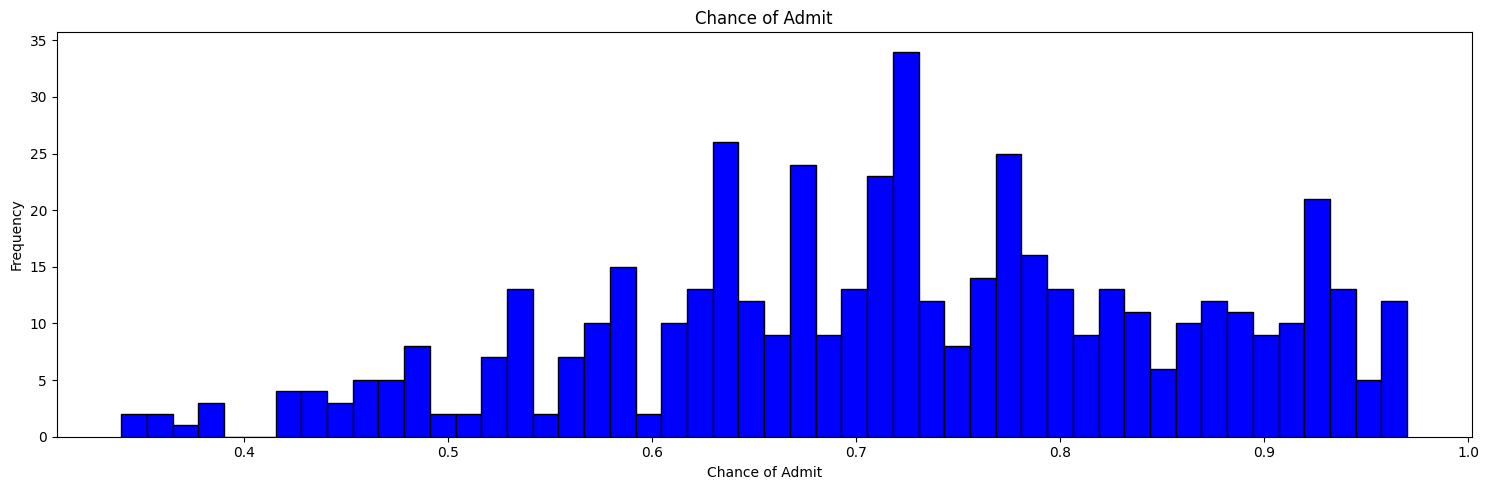

In [175]:
plt.hist(df['Chance of Admit '], bins=50, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Chance of Admit')
plt.ylabel('Frequency')
plt.title(f'Chance of Admit')

# Show the plot
plt.show()

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into features (X) and target variable (y)
X = df.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = df['Chance of Admit ']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [177]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


PCA and t-SNE

In [178]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
X_train_tsne, X_test_tsne, _, _ = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

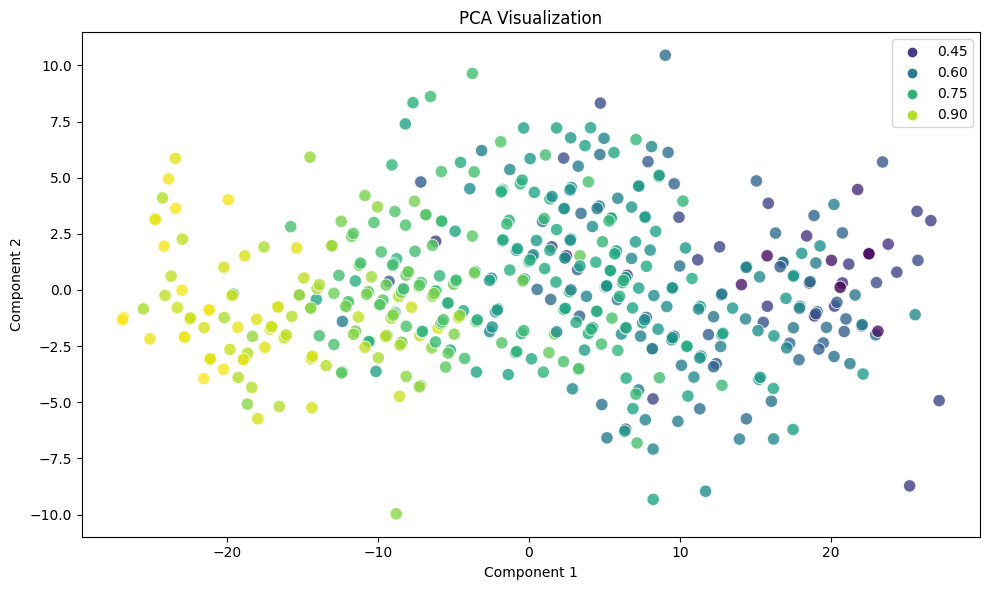

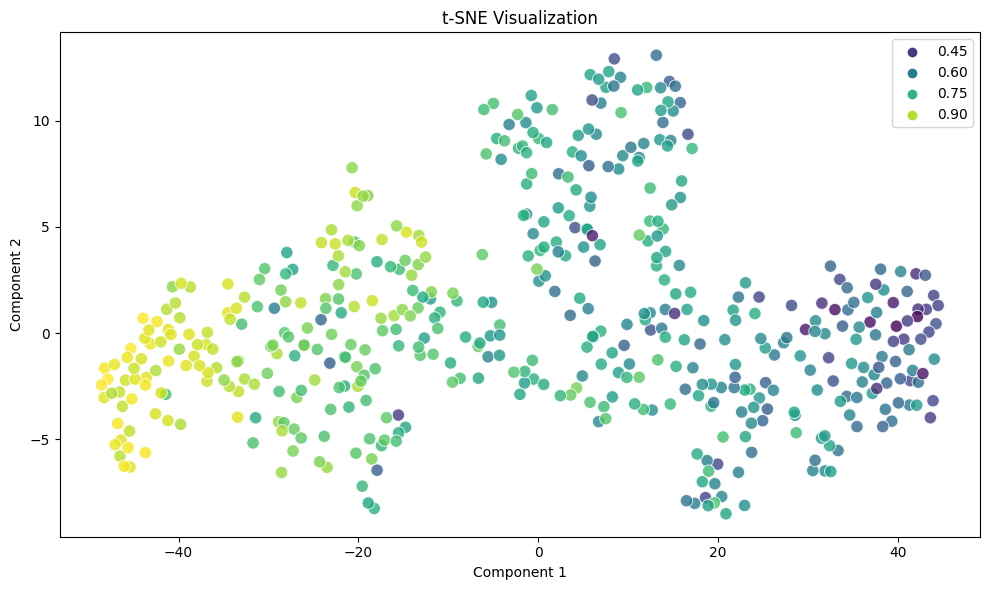

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot PCA and t-SNE results
def plot_dimensionality_reduction(X_transformed, y, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1], hue=y, palette="viridis", s=80, alpha=0.8)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()

# Plot PCA results
plot_dimensionality_reduction(X_pca, y, "PCA Visualization")

# Plot t-SNE results
plot_dimensionality_reduction(X_tsne, y, "t-SNE Visualization")

In [180]:
X_train=X_train_scaled
X_test=X_test_scaled

In [181]:
X_train

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [182]:
X_train_scaled

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

Applying different models on scaled dataset and also applying cross validation and finding the mse error

In [183]:
# Linear Regression model
lr = LinearRegression()

cv_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Cross-validation Mean Squared Error:", -cv_scores.mean())

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print(f"Linear Regression Mean Squared Error on Test Set: {lr_mse}")


Cross-validation Mean Squared Error: 0.003636517808344418
Linear Regression Mean Squared Error on Test Set: 0.0037046553987884127


In [184]:
# Support Vector Machine (SVR)
svr = SVR()

cv_scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Cross-validation Mean Squared Error:", -cv_scores.mean())

svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
print(f"SVM (SVR) Mean Squared Error: {svr_mse}")


Cross-validation Mean Squared Error: 0.005449253482663958
SVM (SVR) Mean Squared Error: 0.004929708416617981


In [185]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor()

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Cross-validation Mean Squared Error:", -cv_scores.mean())

rf_regressor.fit(X_train, y_train)
rf_regressor_pred = rf_regressor.predict(X_test)
rf_regressor_mse = mean_squared_error(y_test, rf_regressor_pred)
print(f"Random Forest Regressor Mean Squared Error: {rf_regressor_mse}")



Cross-validation Mean Squared Error: 0.004314687274999994
Random Forest Regressor Mean Squared Error: 0.004224645499999998


In [186]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

cv_scores = cross_val_score(dt_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Cross-validation Mean Squared Error:", -cv_scores.mean())

dt_regressor.fit(X_train, y_train)
dt_regressor_pred = dt_regressor.predict(X_test)
dt_regressor_mse = mean_squared_error(y_test, dt_regressor_pred)
print(f"Decision Tree Regressor Mean Squared Error: {dt_regressor_mse}")

Cross-validation Mean Squared Error: 0.007667749999999999
Decision Tree Regressor Mean Squared Error: 0.008310999999999999


In [187]:
# K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor()

cv_scores = cross_val_score(knn_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Cross-validation Mean Squared Error:", -cv_scores.mean())

knn_regressor.fit(X_train, y_train)
knn_regressor_pred = knn_regressor.predict(X_test)
knn_regressor_mse = mean_squared_error(y_test, knn_regressor_pred)
print(f"K-Nearest Neighbors Regressor Mean Squared Error: {knn_regressor_mse}")

Cross-validation Mean Squared Error: 0.00423741
K-Nearest Neighbors Regressor Mean Squared Error: 0.004494719999999999


Fine tuning Random Forest model using GridSearchCV

In [188]:
# hyperparameter tuning using GridSearchCV
def tune_hyperparameters(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    return best_model, best_params
    
# hyperparameter tuning for Random Forest Regressor
from sklearn.model_selection import GridSearchCV

param_grid_rf_regressor = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

best_rf_regressor, best_params_rf_regressor = tune_hyperparameters(
    RandomForestRegressor(),
    param_grid_rf_regressor,
    X_train,
    y_train
)

print("Best Parameters for Random Forest Regressor:")
print(best_params_rf_regressor)


In [190]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Using the best parameters obtained from hyperparameter tuning
best_rf_regressor = RandomForestRegressor(n_estimators=best_params_rf_regressor['n_estimators'],
                                          max_depth=best_params_rf_regressor['max_depth'],
                                          min_samples_split=best_params_rf_regressor['min_samples_split'],
                                          min_samples_leaf=best_params_rf_regressor['min_samples_leaf'])

cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("Cross-validation Mean Squared Error:", -cv_scores.mean())

best_rf_regressor.fit(X_train, y_train)
y_pred_rf = best_rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error for Random Forest Regressor:", mse_rf)


Cross-validation Mean Squared Error: 0.004207482026206761
Mean Squared Error for Random Forest Regressor: 0.003940680348423604


In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


def predict_admission_chance(gre_score, toefl_score, university_rating, sop, lor, cgpa, research):
    
    input_data = np.array([[gre_score, toefl_score, university_rating, sop, lor, cgpa, research]])

    input_data_scaled = scaler.transform(input_data)

    admission_chance = best_rf_regressor.predict(input_data_scaled)[0]

    return admission_chance


iface = gr.Interface(
    fn=predict_admission_chance,
    inputs=[
        gr.Number(label="GRE Score",  info="Min value is 260 and max value is 340"),
        gr.Number(label="TOEFL Score", info="Min value is 0 and max value is 120"),
        gr.Number(label="University Rating", info="Min value is 1 and max value is 5"),
        gr.Number(label="SOP", info="Min value is 1 and max value is 5"),
        gr.Number(label="LOR", info="Min value is 1 and max value is 5"),
        gr.Number(label="CGPA", info="Min value is 0 and max value is 10"),
        gr.Number(label="Research", info="Enter value either 0 or 1"),
    ],
    outputs=gr.Textbox(label="Predicted Admission Chance"),
    live=True
)


iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7885

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


2023/11/13 15:13:23 [W] [service.go:132] login to server failed: dial tcp 44.237.78.176:7000: i/o timeout


**NEURAL NETWORK IMPLEMENTATION**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization

input_layer = Input(shape=(X_train.shape[1],))
hidden_layer1 = Dense(64, activation='relu')(input_layer)
batch_norm1 = BatchNormalization()(hidden_layer1)
dropout1 = Dropout(0.5)(batch_norm1)
hidden_layer2 = Dense(32, activation='relu')(dropout1)
batch_norm2 = BatchNormalization()(hidden_layer2)
dropout2 = Dropout(0.5)(batch_norm2)
output_layer = Dense(1, activation='linear')(dropout2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_test, y_test))

loss, mse = model.evaluate(X_test, y_test)
print(f'Test Mean Squared Error: {mse}')

predictions = model.predict(X_test)
print(predictions)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

def predict_admission_chance(gre_score, toefl_score, university_rating, sop, lor, cgpa, research):
    input_data = np.array([[gre_score, toefl_score, university_rating, sop, lor, cgpa, research]])

    input_data_scaled = scaler.transform(input_data)

    admission_chance = model.predict(input_data_scaled)[0]

    return admission_chance

# Create Gradio interface
iface = gr.Interface(
    fn=predict_admission_chance,
    inputs=[
        gr.Number(label="GRE Score",  info="Min value is 260 and max value is 340"),
        gr.Number(label="TOEFL Score", info="Min value is 0 and max value is 120"),
        gr.Number(label="University Rating", info="Min value is 1 and max value is 5"),
        gr.Number(label="SOP", info="Min value is 1 and max value is 5"),
        gr.Number(label="LOR", info="Min value is 1 and max value is 5"),
        gr.Number(label="CGPA", info="Min value is 0 and max value is 10"),
        gr.Number(label="Research", info="Enter value either 0 or 1"),
    ],
    outputs=gr.Textbox(label="Predicted Admission Chance"),
    live=True
)

iface.launch()
